<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/notebooks/burst_false_positives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
t1 = time.time()

#Supplementary Figures 6 and 7: False positive trajectories from stationary bursty dynamics

In this notebook, we simulate 10 cell types with bursty dynamics and visualize the velocity fields inferred by `velocyto`.

In [2]:
%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
!pip install scanpy
!pip install umap-learn

In [3]:
from vis import *

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [4]:
nCells = 3000
nGenes = 100
T=20 #integration timescale
nclus= 10
seed = 42
meta = nCells,nGenes,T,nclus,seed

In [5]:
simdata = simulate_burst_model(*meta)

In [6]:
!mkdir -p data
!mkdir -p figure

In [7]:
name = 'data/simdata_bursts'
sim_export(simdata,meta,name)

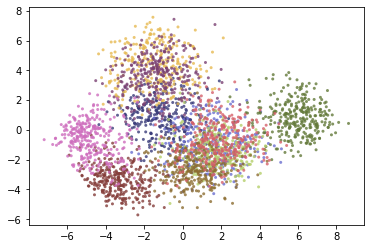

In [8]:
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
vlm.ca['Clusters'] = vlm.ca['celltype'].astype('int')
preprocess(vlm,sim=False,meta=meta,filter=False)
fig,ax=plt.subplots(1,1,figsize=(6,4))
plotEmbed(ax,vlm,"ps",sim=False)


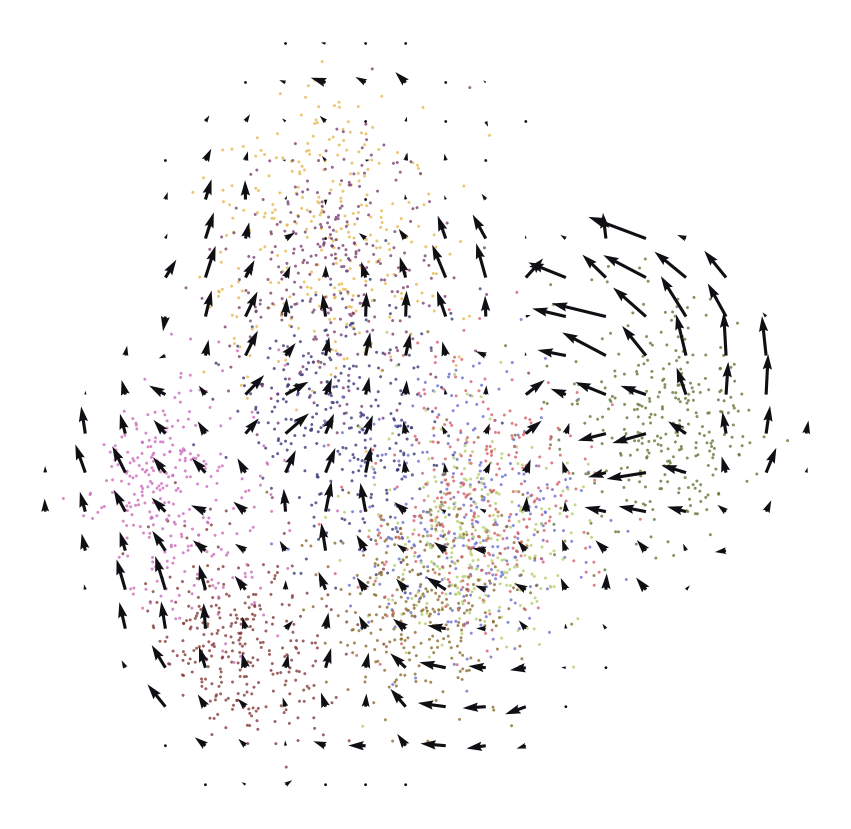

In [9]:
fig1,ax1 = plt.subplots(1,1,figsize=[15,15])
gridArrowPlots(vlm,Trans=["sqrt"],embed="PCA",sim=False,ax=ax1,title=False,
               legend=False,steps=(20,20),quiver_scale=10,plot_baseline=False)

In [25]:
fig1.savefig('figure/pca_burst.png',dpi=600)


In [12]:
vel = vlm.delta_S 
# vel = vlm.Ux - vlm.Sx*vlm.gammas[:,None] - vlm.q[:,None]
# vel = vel>0

In [13]:
# vel.sum(1)

In [14]:
# fig1.savefig('figure/pca_burst.png',dpi=600)
i_ = np.flip(np.argsort(-(vel.sum(1)))) #descending order
i_names = [str(i__) for i__ in i_[:10]]
i_ = np.flip(np.argsort(vel.sum(1)))
i_names += [str(i__) for i__ in i_[:10]]


In [20]:
i_nm = [str(i_names[j]) for j in [0,2,5,7,8]] + ['43']

In [21]:
i_nm

['26', '78', '20', '52', '95', '43']

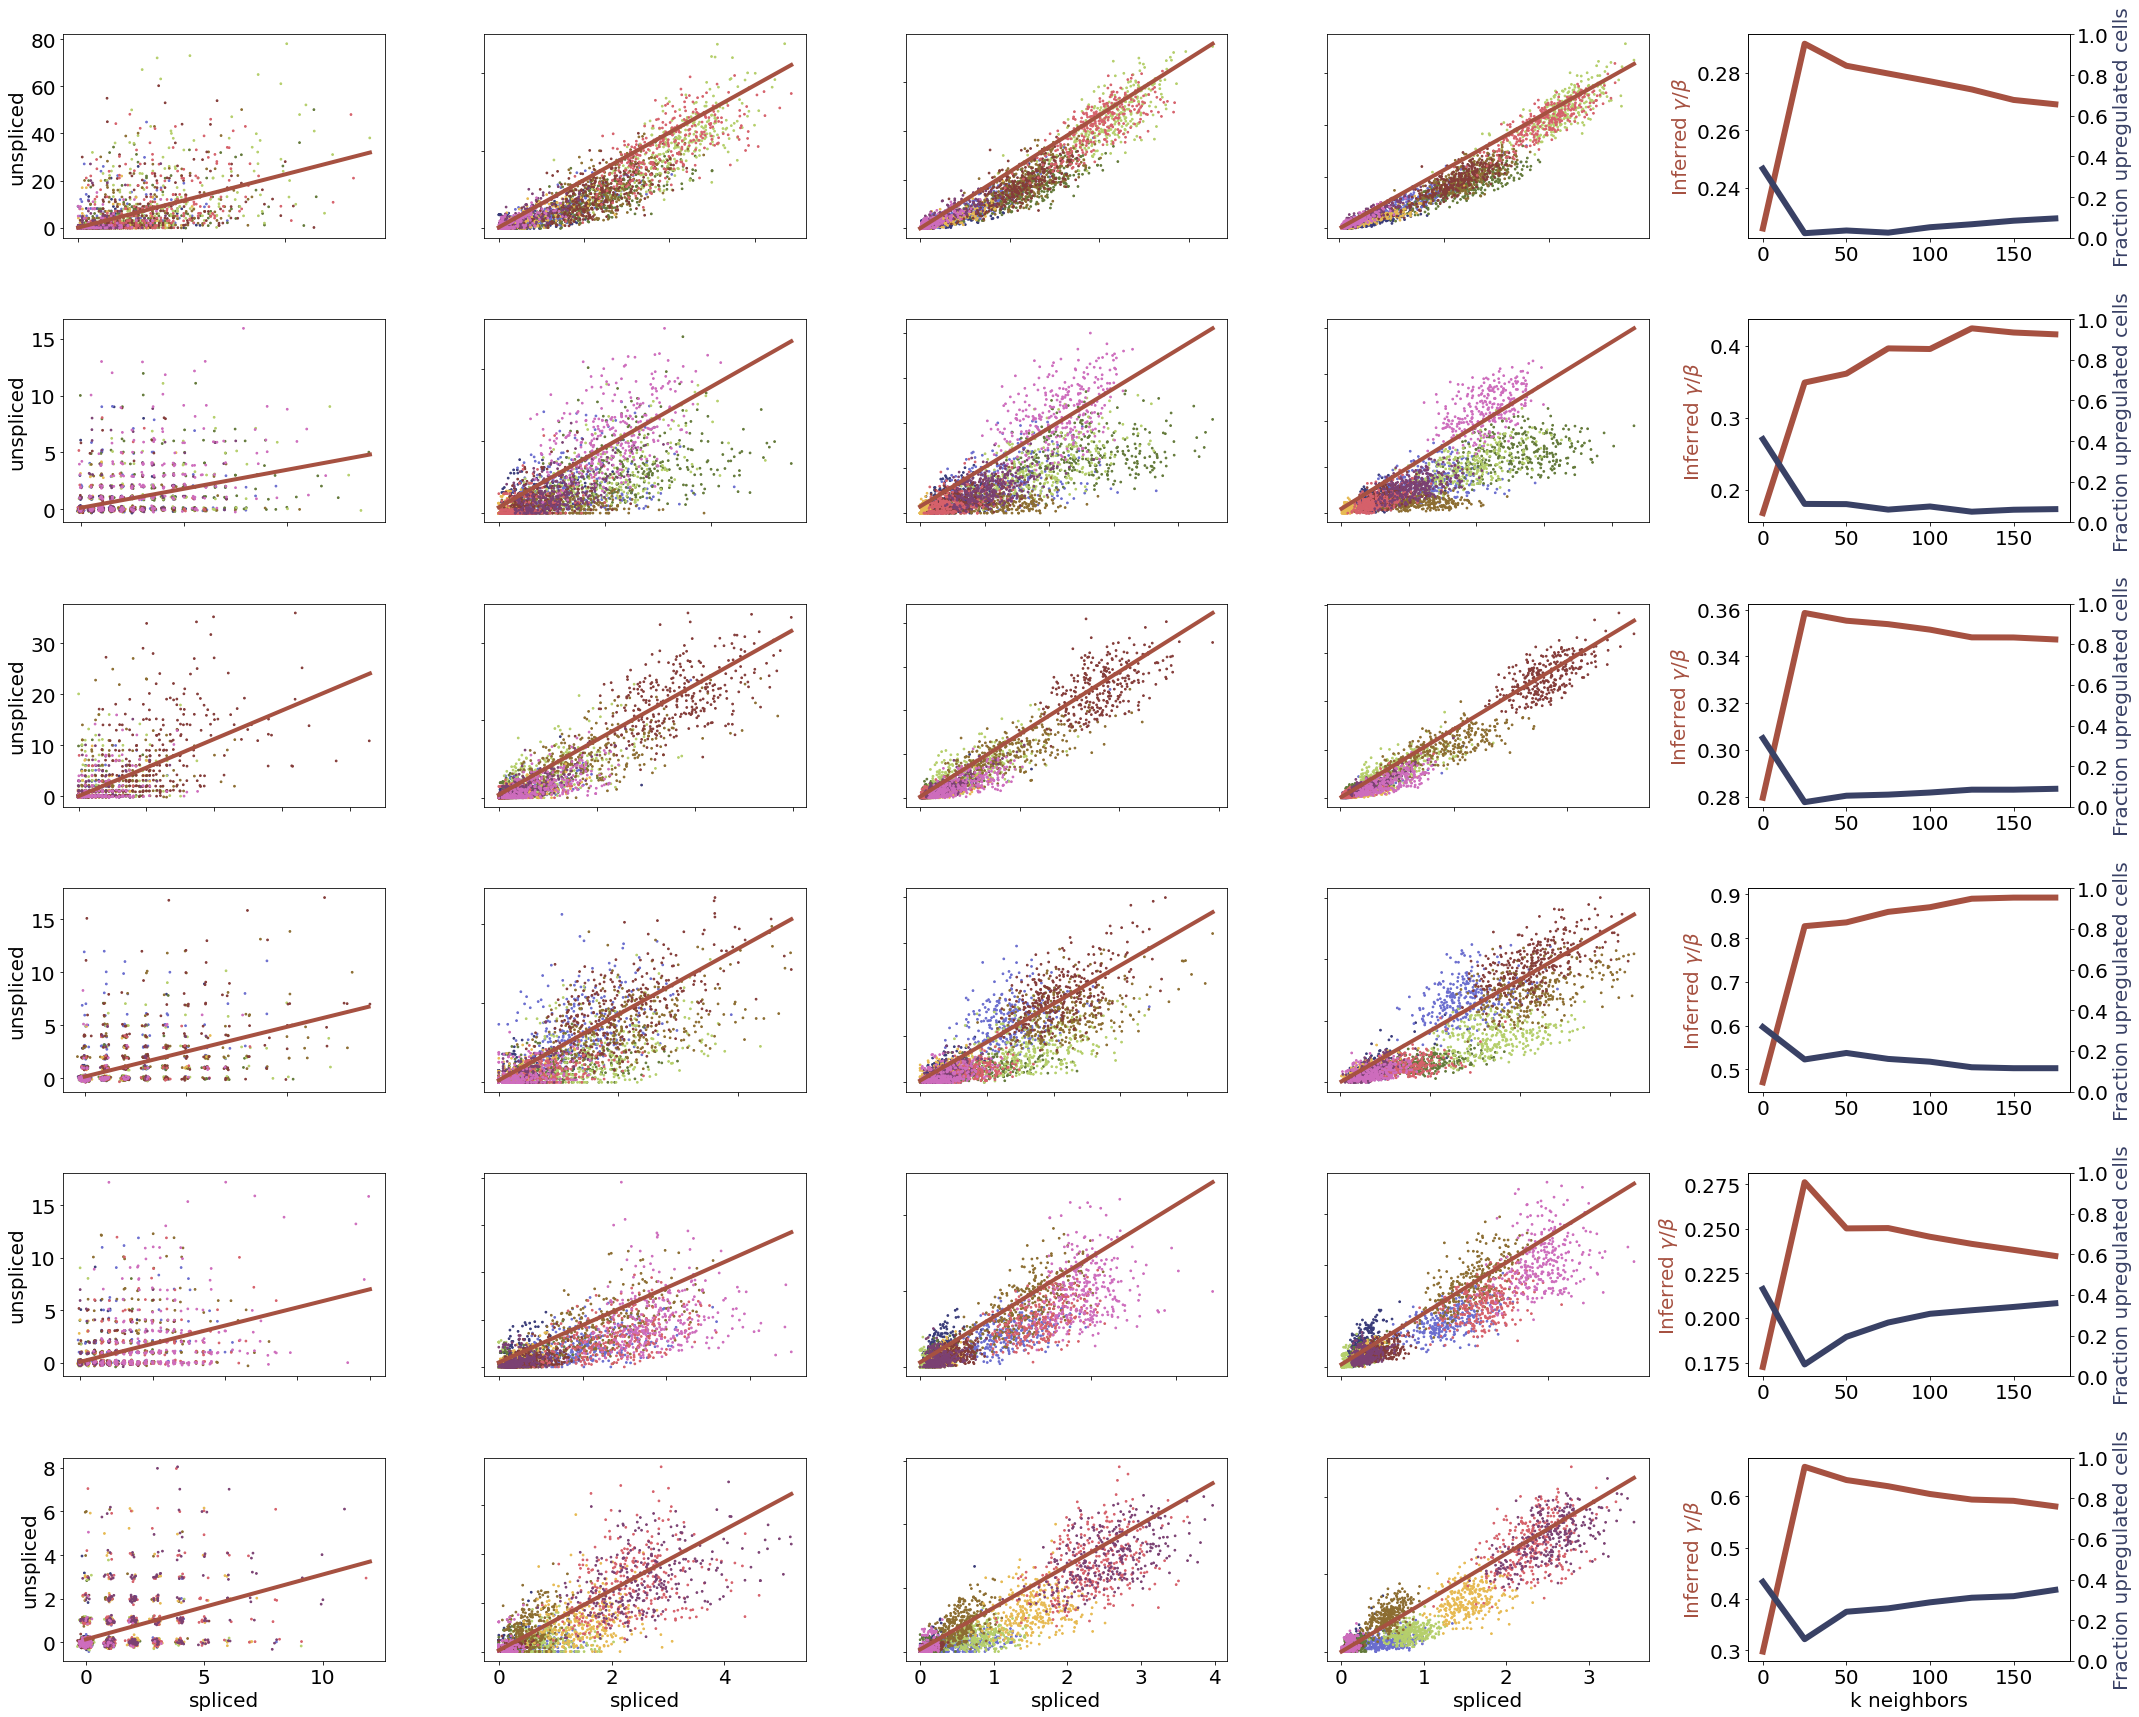

In [22]:
plt.rcParams.update({'font.size': 20})
fig = phasePlots(vlm,genes=i_nm,n_neighs=[0,10,25,50],n_neighs_list=np.arange(0,200,25),sim=False,zero_is_special=True)

In [23]:
fig.savefig('figure/phaseplots_burst.png',dpi=600)

In [24]:
t2 = time.time()
print('Notebook runtime: {:.1f} seconds.'.format(t2-t1))


Notebook runtime: 422.6 seconds.
